In [5]:
import pandas as pd

df=pd.read_csv("/content/Titanic-Dataset.csv")

# Basic info
print(df.head())
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  

D

In [8]:
# Safely fill missing values (no chained assignment)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop 'Cabin' if present
if 'Cabin' in df.columns:
    df.drop('Cabin', axis=1, inplace=True)

# Confirm
print(df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [14]:
# Convert 'Sex' to numerical (binary)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Encode 'Embarked' if it exists
if 'Embarked' in df.columns:
    df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

cols_to_drop = ['Name', 'Ticket']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)


In [15]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# Initialize scaler
scaler = StandardScaler()

# Apply scaler
df[num_cols] = scaler.fit_transform(df[num_cols])


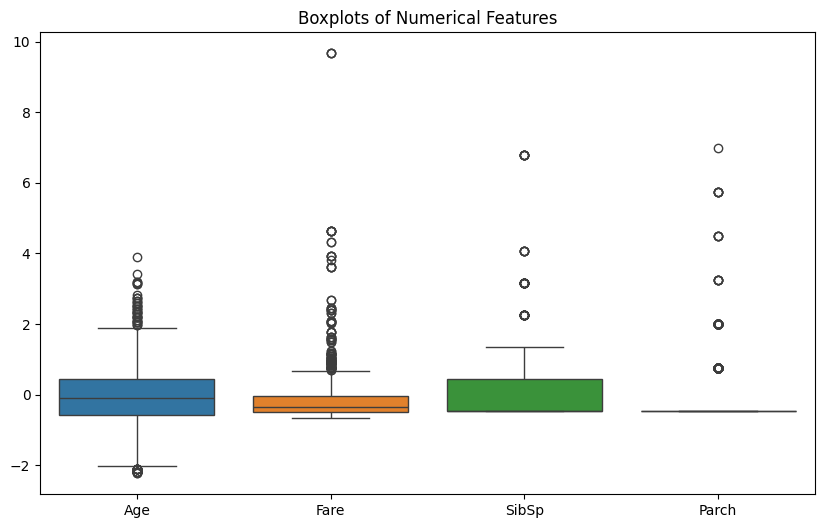

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize outliers using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Age', 'Fare', 'SibSp', 'Parch']])
plt.title("Boxplots of Numerical Features")
plt.show()

# Remove outliers using IQR method (example on 'Fare')
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Keep rows within bounds
df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]
